In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv('data_7000_orig.csv', names = ['Image_name', 'Image_URL', 'OCR_extracted_text', 'corrected_text', 'type', 'Sarcasm', 'offensive', 'Motivational', 'Overall_Sentiment'])

In [80]:
#df.describe()
df.head()

,Image_name,Image_URL,OCR_extracted_text,corrected_text,type,Sarcasm,offensive,Motivational,Overall_Sentiment
0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive
3,10_year_10-year-challenge-sweet-dee-edition-40...,https://pics.conservativememes.com/10-year-cha...,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,very_funny,twisted_meaning,very_offensive,motivational,positive
4,10_year_10-year-challenge-with-no-filter-47-hi...,https://pics.me.me/10-year-challenge-with-no-f...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,hilarious,very_twisted,very_offensive,not_motivational,neutral


In [81]:
df1 = df[['corrected_text', 'Overall_Sentiment']]

In [82]:
df1.head()

,corrected_text,Overall_Sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,The best of #10 YearChallenge! Completed in le...,very_positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [83]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 2 columns):
corrected_text       6592 non-null object
Overall_Sentiment    6521 non-null object
dtypes: object(2)
memory usage: 103.3+ KB


In [84]:
df1 = df1.dropna(how = 'any', axis=0) 

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6512 entries, 0 to 6600
Data columns (total 2 columns):
corrected_text       6512 non-null object
Overall_Sentiment    6512 non-null object
dtypes: object(2)
memory usage: 152.6+ KB


In [86]:
sent_list = ['very_positive', 'positive', 'neutral', 'negative', 'very_negative']
df1 = df1[df1['Overall_Sentiment'].isin(sent_list)]
df1.head()

,corrected_text,Overall_Sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,The best of #10 YearChallenge! Completed in le...,very_positive
2,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,10 Year Challenge - Sweet Dee Edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral


In [87]:
codes = df1.Overall_Sentiment.astype('category').cat.codes
df1['sentiment_int'] = codes
codes.unique()

array([4, 2, 1, 0, 3])

In [88]:
list_1 = list(pd.unique(df1['sentiment_int'].values))
labels = df1['sentiment_int'].replace({1:1, 2:2, 3:3, 4:4, 0:0})

In [89]:
df1["corrected_text"] = df1['corrected_text'].str.replace('[^\w\s]','')

In [90]:
text = df1['corrected_text'].str.lower()

In [91]:
df1['meme_text'] = text

In [92]:
df1.head()

,corrected_text,Overall_Sentiment,sentiment_int,meme_text
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,4,look there my friend lightyear now all sohalik...
1,The best of 10 YearChallenge Completed in less...,very_positive,4,the best of 10 yearchallenge completed in less...
2,Sam Thorne Strippin Follow Follow Saw everyon...,positive,2,sam thorne strippin follow follow saw everyon...
3,10 Year Challenge Sweet Dee Edition,positive,2,10 year challenge sweet dee edition
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,1,10 year challenge with no filter 47 hilarious ...


In [93]:
df2 = df1[['meme_text', 'sentiment_int']]
df2.head()

,meme_text,sentiment_int
0,look there my friend lightyear now all sohalik...,4
1,the best of 10 yearchallenge completed in less...,4
2,sam thorne strippin follow follow saw everyon...,2
3,10 year challenge sweet dee edition,2
4,10 year challenge with no filter 47 hilarious ...,1


## 4: Very positive, 3:Very Negative, 2:Positive, 1:Neutral, 0:Negative

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

Text(0.5, 1.0, 'Number of Sentiments')

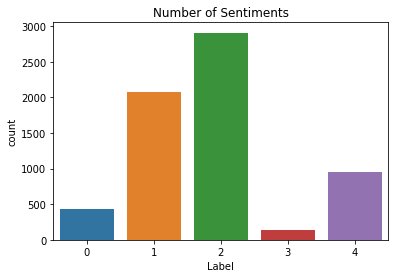

In [95]:
sns.countplot(df2.sentiment_int)
plt.xlabel('Label')
plt.title('Number of Sentiments')

In [96]:
df1['sentiment'] = df1['Overall_Sentiment'].astype('category') 

In [97]:
df1.head()

,corrected_text,Overall_Sentiment,sentiment_int,meme_text,sentiment
0,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive,4,look there my friend lightyear now all sohalik...,very_positive
1,The best of 10 YearChallenge Completed in less...,very_positive,4,the best of 10 yearchallenge completed in less...,very_positive
2,Sam Thorne Strippin Follow Follow Saw everyon...,positive,2,sam thorne strippin follow follow saw everyon...,positive
3,10 Year Challenge Sweet Dee Edition,positive,2,10 year challenge sweet dee edition,positive
4,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral,1,10 year challenge with no filter 47 hilarious ...,neutral


In [98]:
X = df2.meme_text
Y = df2.sentiment_int
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [100]:
max_words = 10000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [101]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [102]:
model = RNN()
model.summary()
model.compile(loss='mean_squared_error',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           500000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [103]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Train on 4427 samples, validate on 1107 samples
Epoch 1/10
4427/4427 [==============================] - 5s 1ms/step - loss: 1.9214 - accuracy: 0.3246 - val_loss: 1.8491 - val_accuracy: 0.3071
Epoch 2/10
4427/4427 [==============================] - 4s 981us/step - loss: 1.9214 - accuracy: 0.3246 - val_loss: 1.8491 - val_accuracy: 0.3071


In [104]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [105]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df2['meme_text'].values)
X = tokenizer.texts_to_sequences(df2['meme_text'].values)
X = pad_sequences(X)

In [106]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 127, 128)          256000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 127, 128)          0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 985       
Total params: 511,785
Trainable params: 511,785
Non-trainable params: 0
_________________________________________________________________
None


In [107]:
Y = pd.get_dummies(df2['sentiment_int']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(4362, 127) (4362, 5)
(2149, 127) (2149, 5)


In [108]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
 - 26s - loss: 1.2970 - accuracy: 0.4310
Epoch 2/10
 - 27s - loss: 1.2608 - accuracy: 0.4507
Epoch 3/10
 - 28s - loss: 1.2065 - accuracy: 0.4998
Epoch 4/10
 - 26s - loss: 1.1009 - accuracy: 0.5390
Epoch 5/10
 - 25s - loss: 1.0046 - accuracy: 0.5862
Epoch 6/10
 - 30s - loss: 0.9390 - accuracy: 0.6155
Epoch 7/10
 - 25s - loss: 0.8559 - accuracy: 0.6410
Epoch 8/10
 - 26s - loss: 0.7906 - accuracy: 0.6820
Epoch 9/10
 - 31s - loss: 0.7207 - accuracy: 0.7079
Epoch 10/10
 - 31s - loss: 0.6563 - accuracy: 0.7442


In [47]:
n_folds = 3 
cv_scores, model_history = list(), list()
for i in range(n_folds):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state = 42)
    model, test_acc = model.fit(X_test, Y_test, epochs = 10, batch_size = 32)
    #print('>%.3f' % test_acc)
    cv_scores.append(test_acc)
    model_history.append(model)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

Epoch 1/10
652/652 [==============================] - 4s 6ms/step - loss: 0.7393 - accuracy: 0.7025
Epoch 2/10
652/652 [==============================] - 4s 6ms/step - loss: 0.6751 - accuracy: 0.7408
Epoch 3/10
652/652 [==============================] - 4s 5ms/step - loss: 0.5958 - accuracy: 0.7883
Epoch 4/10
652/652 [==============================] - 4s 6ms/step - loss: 0.5108 - accuracy: 0.8160
Epoch 5/10
652/652 [==============================] - 5s 7ms/step - loss: 0.4764 - accuracy: 0.8390
Epoch 6/10
652/652 [==============================] - 6s 10ms/step - loss: 0.3724 - accuracy: 0.8696
Epoch 7/10
652/652 [==============================] - 7s 10ms/step - loss: 0.3314 - accuracy: 0.8926
Epoch 8/10
652/652 [==============================] - 6s 10ms/step - loss: 0.2879 - accuracy: 0.9018
Epoch 9/10
652/652 [==============================] - 6s 9ms/step - loss: 0.2442 - accuracy: 0.9248
Epoch 10/10
652/652 [==============================] - 7s 10ms/step - loss: 0.2003 - accuracy: 0.

TypeError: cannot unpack non-iterable History object

In [109]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 2.04
acc: 0.35


In [110]:
pos_cnt, neg_cnt, neg_correct, pos_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 3 or np.argmax(Y_validate[x]) == 4:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 3 or np.argmax(Y_validate[x]) == 4:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 41.62679425837321 %
neg_acc 9.75609756097561 %


In [123]:
model.save("LSTM_model.h5")

In [128]:
hf = h5py.File('LSTM_model.h5', 'r')

In [129]:
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [138]:
weights = model.get_weights()
np.save('lstm.npy', weights)

In [111]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) 

In [112]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))
cm

array([[  9,  17,  13,   0,   2],
       [ 39,  45,  77,   1,  13],
       [ 73,  84, 125,   2,  24],
       [  6,   4,   6,   0,   2],
       [ 19,  29,  48,   0,  11]])

In [113]:
confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))


array([[  9,  17,  13,   0,   2],
       [ 39,  45,  77,   1,  13],
       [ 73,  84, 125,   2,  24],
       [  6,   4,   6,   0,   2],
       [ 19,  29,  48,   0,  11]])

In [82]:
skf = StratifiedKFold(n_splits=3, random_state = 42, shuffle = True)
skf.get_n_splits(X, Y)

3

In [114]:
df2['sentiment_int'].count()


6511

In [122]:
pd.value_counts(df2['sentiment_int'].values.flatten())

2    2908
1    2070
4     957
0     438
3     138
dtype: int64